<h1>데이터 불러오기</h1>

경로 지정//데이터에서 매매종합 파일만 불러오기

In [154]:
import pandas as pd

#경로지정
path = r'데이터/★(월간)KB주택가격동향_시계열(2020.08).xlsx'

#매매종합 시트만 불러오기
raw_data = pd.read_excel(path, sheet_name='매매종합')

엑셀 시트가 잠금으로 보호 되어 있는 경우 >>> xlwings 를 사용한다.

In [155]:
import pandas as pd
import xlwings as xw

path = r'데이터/★(월간)KB주택가격동향_시계열(2020.08).xlsx'

#xlwings >>> 잠금된 데이터 읽어오기
wb = xw.Book(path)
sheet = wb.sheets['매매종합']
#행의 개수
row_num = sheet.range(1,1).end('down').end('down').end('down').row
#행 A2 ~ 열 GE까지
data_range = 'A2:GE' + str(row_num)
#범위 데이터 option 함수 이용 // index, header은 정하지 않음 // 0,1,2,3,4 같이 정하고, 맨 위에 행 컬럼을 설정
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
data_range

'A2:GE420'

데이터 컬럼 정리
<br>3개의 계층 '시-도' / '구-군' / '영어이름'

In [156]:
##시도/구군 계층 가져와서 리스트 만들기
#전국 시,도
big_col = list(raw_data.columns)
#구,군,
small_col = list(raw_data.iloc[0])

In [157]:
#small_col 에 지역명 배치하고 none 제거

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
        
print(small_col)

['구분', '전국', '서울', '강북', '강북구', '광진구', '노원구', '도봉구', '동대문구', '마포구', '서대문구', '성동구', '성북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남', '강남구', '강동구', '강서구', '관악구', '구로구', '금천구', '동작구', '서초구', '송파구', '양천구', '영등포구', '6개광역시', '부산', '중구', '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구', '수영구', '사상구', '기장군', '강서구', '대구', '중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '달성군', '인천', '중구', '동구', '미추홀구', '연수구', '남동구', '부평구', '계양구', '서구', '광주', '동구', '서구', '남구', '북구', '광산구', '대전', '동구', '중구', '서구', '유성구', '대덕구', '울산', '중구', '남구', '동구', '북구', '울주군', '5개광역시\n(인천外)', '수도권', '세종', '경기', '수원', '장안구', '권선구', '팔달구', '영통구', '성남', '수정구', '중원구', '분당구', '고양', '덕양구', '일산동구', '일산서구', '안양', '만안구', '동안구', '부천', '의정부', '광명', '평택', '안산', '단원구', '상록구', '과천', '구리', '남양주', '용인', '처인구', '기흥구', '수지구', '시흥', '군포', '의왕', '하남', '오산', '파주', '이천', '안성', '김포', '양주', '동두천', '광주', '화성', '강원', '춘천', '강릉', '원주', '충북', '청주', '상당구', '서원구', '청원구', '흥덕구', '충주', '제천', '충남', '천안', '동남구', '서북구', '공주', '아산', '논산', '계룡'

In [158]:
##big_col 리스트에서 None 없애고, small_col, big_col 리스트의 시,도 와 구, 군이 서로 대응되게 처리

#big_col, small_col 리스트 완성하기

bignames = "서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경부 경남 제주도 6개광역시 5개광역시 수도권 기타지역 구분 전국"

bigname_list = bignames.split(" ")
big_col = list(raw_data.columns)
small_col = list(raw_data.iloc[0])

for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
        
    check = num
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check = check - 1


경기도 광주와 광주시 이름이 같아서 잘못 들어간 부분// 수정

제주도는 kb부동산에서 제공하는 칼럼명이 다른 지역과 형식이 다름 // 수정

In [159]:
#small_col, big_col 예외 부분 수정하기()
big_col[129] = '경기'
big_col[130] = '경기'
small_col[185] = '서귀포'

In [160]:
#새로운 컬럼 입력

raw_data.columns = [big_col, small_col]
new_col_data = raw_data.drop([0,1])

In [161]:
index_list = list(new_col_data['구분']['구분'])

new_index = []

for num , raw_index in enumerate(index_list):
    temp = str(raw_index).split('.')

    if int(temp[0]) > 12:
        if len(temp[0]) == 2:
            new_index.append('19'+temp[0]+'.'+temp[1])
        else:
            new_index.append(temp[0]+'.'+temp[1])
            
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])      
#만들어진 날짜 리스트를 인덱스로 설정
new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_data = new_col_data.drop(('구분','구분'), axis=1)
cleaned_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2020-04-01  101.744  104.072  103.577  103.194  103.713  104.269   101.47   
2020-05-01  101.884  104.092  103.647  103.204  103.819  104.314  101.502   
2020-06-01  102.377  104.641  104.395  104.681  104.207  105.416  101.609   
2020-07-01  103.278  106.162  106.014  107.576  105.294  108.904  103.525   
2020-08-01  104.081  107.757  107.699  108.743  106.128  112.213  105.814   

                                       ...       경남                       \
               동대문구      마포구     서대문구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2020-04-01  104.412  104.726  104.908  ...  96.0797  97.7957  None  None   
2020-05-01   104.43  104.765  104.985  ...  96.0796  97.7957  None  None   
2020-06-01  104.923  105.299  107.092  ...  96.3131  97.7957  None  None   
2020-07-01  106.399   107.05  107.922  ...  97.5763  97.7984  None  None   
2020-08-01   107.62  108.025  108.603  ...  98.6327  98.0696  None  None   

                                     제주도                    
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2020-04-01  97.4822  94.8023  None  None  96.7289  97.6126  
2020-05-01  97.3313  94.7482  None  None  96.6178  97.6021  
2020-06-01  97.2991  94.7982  None  None  96.1616  97.8073  
2020-07-01  97.0673  94.8404  None  None  95.8956  98.1226  
2020-08-01  97.0433  94.9808  None  None  95.8522  98.4884  

[416 rows x 186 columns]

In [162]:
#전처리 함수화
def KBpriceindex_preprocessing(path, data_type):
    #path : KB데이터 엑셀 파일 디렉토리
    #data_type : '매매종합' 등 시트

    wb = xw.Book(path)
    sheet = wb.sheets['매매종합']

    row_num = sheet.range(1,1).end('down').end('down').end('down').row

    data_range = 'A2:GE' + str(row_num)

    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    
    bignames = "서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경부 경남 제주도 6개광역시 5개광역시 수도권 기타지역 구분 전국"

    bigname_list = bignames.split(" ")
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])

    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num , raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')

        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                new_index.append('19'+temp[0]+'.'+temp[1])
            else:
                new_index.append(temp[0]+'.'+temp[1])

        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])      

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data = new_col_data.drop(('구분','구분'), axis=1)
    return cleaned_data
    


In [163]:
path = r'데이터/★(월간)KB주택가격동향_시계열(2020.08).xlsx'
data_type = '매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)
new_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2020-04-01  101.744  104.072  103.577  103.194  103.713  104.269   101.47   
2020-05-01  101.884  104.092  103.647  103.204  103.819  104.314  101.502   
2020-06-01  102.377  104.641  104.395  104.681  104.207  105.416  101.609   
2020-07-01  103.278  106.162  106.014  107.576  105.294  108.904  103.525   
2020-08-01  104.081  107.757  107.699  108.743  106.128  112.213  105.814   

                                       ...       경남                       \
               동대문구      마포구     서대문구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2020-04-01  104.412  104.726  104.908  ...  96.0797  97.7957  None  None   
2020-05-01   104.43  104.765  104.985  ...  96.0796  97.7957  None  None   
2020-06-01  104.923  105.299  107.092  ...  96.3131  97.7957  None  None   
2020-07-01  106.399   107.05  107.922  ...  97.5763  97.7984  None  None   
2020-08-01   107.62  108.025  108.603  ...  98.6327  98.0696  None  None   

                                     제주도                    
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2020-04-01  97.4822  94.8023  None  None  96.7289  97.6126  
2020-05-01  97.3313  94.7482  None  None  96.6178  97.6021  
2020-06-01  97.2991  94.7982  None  None  96.1616  97.8073  
2020-07-01  97.0673  94.8404  None  None  95.8956  98.1226  
2020-08-01  97.0433  94.9808  None  None  95.8522  98.4884  

[416 rows x 186 columns]

<h1>데이터 시각화</h1>

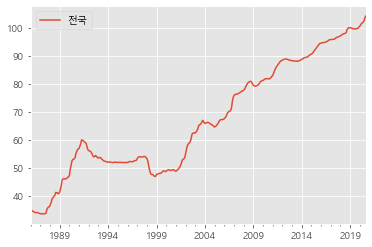

In [164]:
# #matplotlib 불러오기, 한글폰트 설정
# import matplotlib.pyplot as plt
# import platform
# %matplotlib inline
# from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()

# rc("font", family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# matplorlib 불러오고 한글폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#matplotlib inline

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

path = r'데이터/★(월간)KB주택가격동향_시계열(2020.08).xlsx'
data_type = '매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)
new_data['전국']['전국'].plot(legend='전국')
plt.show()

In [165]:
new_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2020-04-01  101.744  104.072  103.577  103.194  103.713  104.269   101.47   
2020-05-01  101.884  104.092  103.647  103.204  103.819  104.314  101.502   
2020-06-01  102.377  104.641  104.395  104.681  104.207  105.416  101.609   
2020-07-01  103.278  106.162  106.014  107.576  105.294  108.904  103.525   
2020-08-01  104.081  107.757  107.699  108.743  106.128  112.213  105.814   

                                       ...       경남                       \
               동대문구      마포구     서대문구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2020-04-01  104.412  104.726  104.908  ...  96.0797  97.7957  None  None   
2020-05-01   104.43  104.765  104.985  ...  96.0796  97.7957  None  None   
2020-06-01  104.923  105.299  107.092  ...  96.3131  97.7957  None  None   
2020-07-01  106.399   107.05  107.922  ...  97.5763  97.7984  None  None   
2020-08-01   107.62  108.025  108.603  ...  98.6327  98.0696  None  None   

                                     제주도                    
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2020-04-01  97.4822  94.8023  None  None  96.7289  97.6126  
2020-05-01  97.3313  94.7482  None  None  96.6178  97.6021  
2020-06-01  97.2991  94.7982  None  None  96.1616  97.8073  
2020-07-01  97.0673  94.8404  None  None  95.8956  98.1226  
2020-08-01  97.0433  94.9808  None  None  95.8522  98.4884  

[416 rows x 186 columns]

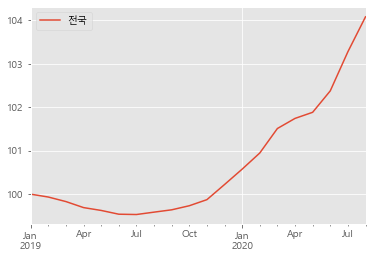

In [166]:
new_data['전국']['전국']['2019-01':].plot(legend='전국')
plt.show()

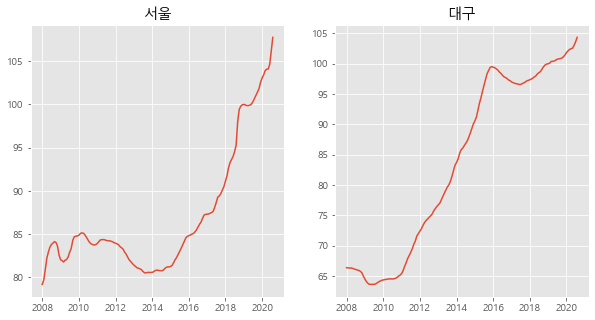

In [167]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("서울")
plt.plot(new_data['서울']['서울']['2008-01':])

plt.subplot(1,2,2)
plt.title("대구")
plt.plot(new_data['대구']['대구']['2008-01':])

plt.show()


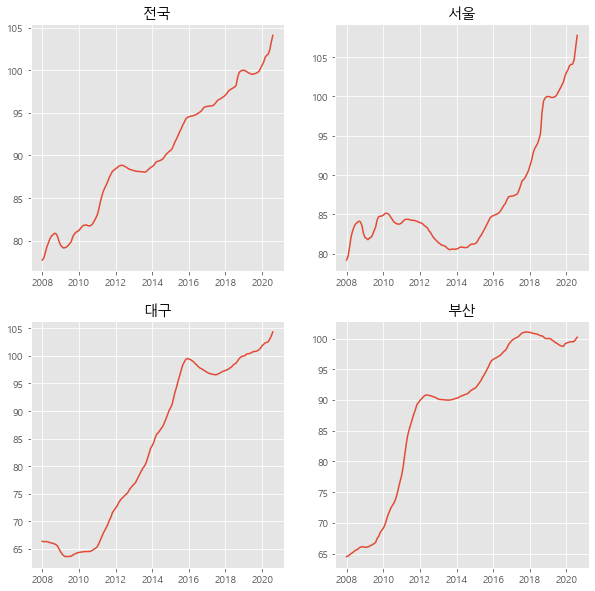

In [168]:
spots = '전국 서울 대구 부산'
start_data = '2008-01'

spot_list = spots.split(' ')
num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    plt.plot(new_data[spot][spot][start_data:])
    
plt.show()

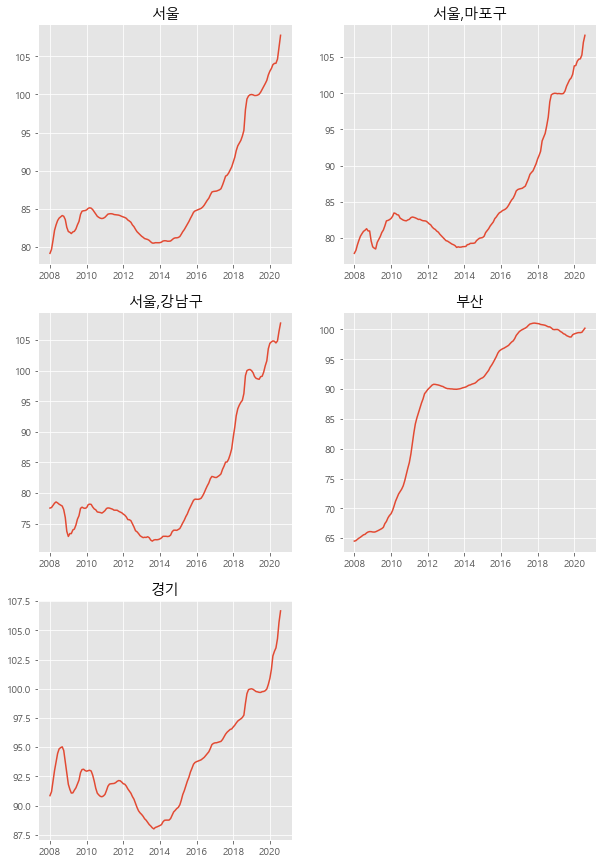

In [169]:
spots = '서울 서울,마포구 서울,강남구 부산 경기'

start_data = '2008-01'
spot_list = spots.split(' ')

num_row = int((len(spot_list)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, spot in enumerate(spot_list):
    plt.subplot(num_row, 2, i+1)
    plt.title(spot)
    if ',' in spot:
        si, gu = spot.split(',')
    else:
        si = gu = spot
        
    plt.plot(new_data[si][gu][start_data:])
plt.show()

In [170]:
#특정 날짜의 전 지역가격지수
new_data.loc['2020-01-01']

전국   전국      100.576
서울   서울      103.056
     강북      102.687
     강북구     103.382
     광진구     102.526
              ...   
경남   김해      94.5887
     통영         None
제주도  제주도        None
     서귀포     97.0367
     기타지방    97.5658
Name: 2020-01-01 00:00:00, Length: 186, dtype: object

In [171]:
#두 날짜 사이 부동산 가격지수 증감률
(new_data.loc['2020-1-1']- new_data.loc['2016-1-1'])/new_data.loc['2016-1-1']*100

전국   전국      6.40082
서울   서울      21.4963
     강북      19.1436
     강북구     11.2515
     광진구     15.3536
              ...   
경남   김해     -13.6796
     통영          NaN
제주도  제주도         NaN
     서귀포     1.09201
     기타지방   -5.10185
Length: 186, dtype: object

In [172]:
#가격지수 증감률 정렬하기

diff = (new_data.loc['2020-1-1']- new_data.loc['2016-1-1'])/new_data.loc['2016-1-1']*100
diff.sort_values()

경남   성산구   -19.6505
     의창구   -14.9381
     김해    -13.6796
울산   북구    -13.5543
전남   구미    -13.2276
             ...   
     김천         NaN
경남   양산         NaN
     거제         NaN
     통영         NaN
제주도  제주도        NaN
Length: 186, dtype: object

In [191]:
#누락된 지역 삭제 및 상위, 하위 10개 출력

diff = ((new_data.loc['2020-1-1']- new_data.loc['2016-1-1'])/new_data.loc['2016-1-1']*100).dropna()
#하위 10개
print(diff.sort_values()[:10])
print('')
#상위 10개
print(diff.sort_values(ascending=False)[:10])

경남  성산구   -19.6505
    의창구   -14.9381
    김해    -13.6796
울산  북구    -13.5543
전남  구미    -13.2276
울산  동구    -12.8805
경남  창원    -12.8257
전남  북구    -11.8666
충북  상당구   -11.4632
경남  진해구   -11.0201
dtype: object

경기  분당구     35.4541
서울  영등포구    34.5259
    강남구     32.2399
    송파구      27.306
경기  광명      26.8217
서울  서초구     26.3822
    양천구     26.1126
    용산구     25.0477
    마포구     24.1542
    서대문구    23.9143
dtype: object


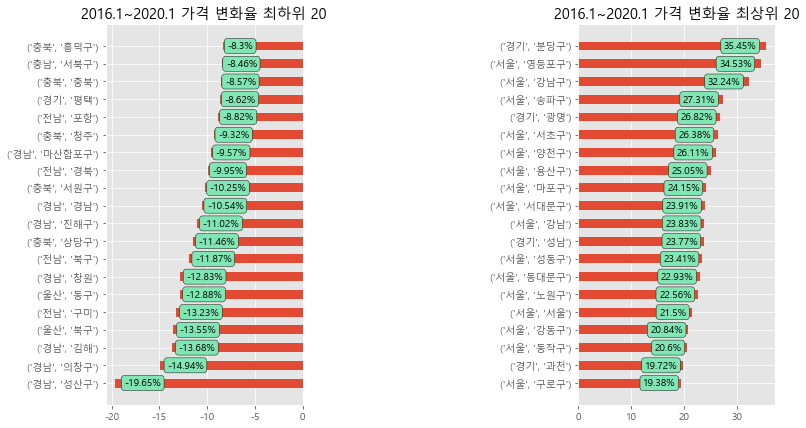

In [192]:
#가격지수 증감률 막대그래프 시각화

import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
style.use('ggplot')


fig = plt.figure(figsize=(12, 7))
ind = np.arange(20)

#하위 20개
ax = fig.add_subplot(1,3,1)
plt.title('2016.1~2020.1 가격 변화율 최하위 20')
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind,diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
            str(round(diff.sort_values()[:20].values[i],2)) + '%',
            ha = 'left', va='center', bbox=dict(boxstyle='round', fc=(0.5,0.9,0.7), ec='0.1'))

#상위 20개
ax2 = fig.add_subplot(1,3,3)
plt.title('2016.1~2020.1 가격 변화율 최상위 20')
rects2 = plt.barh(ind, diff.sort_values()[-20:].values, align='center', height=0.5)
plt.yticks(ind,diff.sort_values()[-20:].index)
for i, rect in enumerate(rects2):
    ax2.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
             str(round(diff.sort_values()[-20:].values[i],2)) + '%',
            ha = 'right', va='center', bbox=dict(boxstyle='round', fc=(0.5,0.9,0.7), ec='0.1'))
    
plt.show()

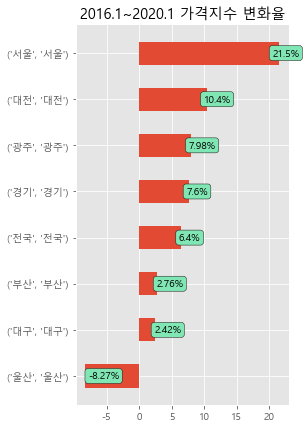

In [194]:
#특정 지역 선택 /// 가격지수 증감률을 막대그래플 시각화
loca = '전국 서울 부산 경기 대구 광주 울산 대전'

temp_list = loca.split(' ')
loca_list = []
for temp in temp_list:
    if ',' in temp:
        temp_split = temp.split(',')
        loca_list.append((temp_split[0], temp_split[1]))
    else:
        loca_list.append((temp, temp))
        
diff = ((new_data.loc['2020-1-1', loca_list] - new_data.loc['2016-1-1', loca_list]) / new_data.loc['2016-1-1',
                                                                                                  loca_list]*100).sort_values()

num = len(loca_list)
fig = plt.figure(figsize=(13,7))
ind = np.arange(num)

ax = fig.add_subplot(1,3,1)
plt.title('2016.1~2020.1 가격지수 변화율')
rects = plt.barh(ind, diff.sort_values()[:20].values, align='center', height=0.5)
plt.yticks(ind,diff.sort_values()[:20].index)
for i, rect in enumerate(rects):
    ax.text(0.95 * rect.get_width(),
            rect.get_y() + rect.get_height() / 2.0,
            str(round(diff.sort_values()[:20].values[i],2)) + '%',
            ha = 'left', va='center', bbox=dict(boxstyle='round', fc=(0.5,0.9,0.7), ec='0.1'))

In [199]:
#지도 불러오기
import json
import folium
geo_path = '데이터//02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [200]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                tiles="Stamen Toner")
map.choropleth(geo_data = geo_str,
              data = rects2,
              columns = [rects2.index, rects2],
              fill_color = "PuRd", #PuRd, YlGnBu,
              key_on = 'feature.id')
map

C:\Users\mrhi6\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


TypeError: cannot convert dictionary update sequence element #0 to a sequence

In [210]:
new_data

전국       서울                                               \
                 전국       서울       강북      강북구      광진구      노원구      도봉구   
1986-01-01  34.6561  30.0438    41.94     None     None     None     None   
1986-02-01  34.6561  30.0438  41.8891     None     None     None     None   
1986-03-01   34.708  30.0024  41.8891     None     None     None     None   
1986-04-01  34.4486  29.8366  41.7366     None     None     None     None   
1986-05-01  34.2929   29.588  41.2791     None     None     None     None   
...             ...      ...      ...      ...      ...      ...      ...   
2020-04-01  101.744  104.072  103.577  103.194  103.713  104.269   101.47   
2020-05-01  101.884  104.092  103.647  103.204  103.819  104.314  101.502   
2020-06-01  102.377  104.641  104.395  104.681  104.207  105.416  101.609   
2020-07-01  103.278  106.162  106.014  107.576  105.294  108.904  103.525   
2020-08-01  104.081  107.757  107.699  108.743  106.128  112.213  105.814   

                                       ...       경남                       \
               동대문구      마포구     서대문구  ...      의창구      진해구    양산    거제   
1986-01-01     None     None     None  ...     None     None  None  None   
1986-02-01     None     None     None  ...     None     None  None  None   
1986-03-01     None     None     None  ...     None     None  None  None   
1986-04-01     None     None     None  ...     None     None  None  None   
1986-05-01     None     None     None  ...     None     None  None  None   
...             ...      ...      ...  ...      ...      ...   ...   ...   
2020-04-01  104.412  104.726  104.908  ...  96.0797  97.7957  None  None   
2020-05-01   104.43  104.765  104.985  ...  96.0796  97.7957  None  None   
2020-06-01  104.923  105.299  107.092  ...  96.3131  97.7957  None  None   
2020-07-01  106.399   107.05  107.922  ...  97.5763  97.7984  None  None   
2020-08-01   107.62  108.025  108.603  ...  98.6327  98.0696  None  None   

                                     제주도                    
                 진주       김해    통영   제주도      서귀포     기타지방  
1986-01-01     None     None  None  None     None     None  
1986-02-01     None     None  None  None     None     None  
1986-03-01     None     None  None  None     None     None  
1986-04-01     None     None  None  None     None     None  
1986-05-01     None     None  None  None     None     None  
...             ...      ...   ...   ...      ...      ...  
2020-04-01  97.4822  94.8023  None  None  96.7289  97.6126  
2020-05-01  97.3313  94.7482  None  None  96.6178  97.6021  
2020-06-01  97.2991  94.7982  None  None  96.1616  97.8073  
2020-07-01  97.0673  94.8404  None  None  95.8956  98.1226  
2020-08-01  97.0433  94.9808  None  None  95.8522  98.4884  

[416 rows x 186 columns]

In [214]:
new_data2.columns
print(new_data2.columns['서울'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices